<a id="0"></a> <br>
# EDA - Table of Contents
In this notebook, the EDA for the project "Rent Price Prediction in the Swiss Housing Market" is presented.

1. [Setup](#1)
    - [SQL Server](#2)
    - [MYSQL](#3)
2. [EDA](#4)
    - [Summary statistics of numeric variables](#5)
    - [Skewness and Kurtosis](#6)
        - [Skewness](#7)
        - [Kurtosis](#8)
        - [Graphical Representation of Skewness and Kurtosis](#9)
    - [Distribution](#10)
        - [Distribution per Object Type](#11)
        - [Top 10 Object Types](#12)
        - [Top 10 Landlords](#13)
    - [Extreme Values](#14)
        - [Cheapest Properties](#15)
        - [Most Expensive Properties](#16)
    - [Contingency Tables](#17)
        - [Number of Rooms across entire Price Range](#18)
        - [Number of Rooms and certain Price Range I](#19)
        - [Number of Rooms and certain Price Range II](#20)
    - [Correlation Matrixes](#21)
        - [Relationship of Prices and Proximity to Services](#22)
        - [Relationship of Prices, Rooms and Square Meters](#23)
        - [Relationship of Prices and Income- and Wealth taxes and Population Density](#24)
    - [Relation between Variables](#25)
        - [Price vs. Number of Rooms](#26)
        - [Price vs. various Variables](#27)
    - [Visualization of Geographical Data](#28)
        - [Heatmap](#29)
       - [Interactive Heatmap](#30)
)e Heatmap](#interactive-heatmap)

<a id="1"></a> 
## Setup

<a id="2"></a>
### SQL Server

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import folium
from folium.plugins import HeatMap

sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

print(os.getcwd())

#DB-Connection
driver = '{ODBC Driver 17 for SQL Server}' # This might be a different version on your system
server = 'ANNINAYOGA\SQLEXPRESS'
database = 'Immo'
username = 'immoadmin'
password = 'zhaw$1234'
connection_string = f"DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;"

#Connection and SQL-Query for table property
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM property"
df_property = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

#Connection and SQL-Query for table location
cnxn = pyodbc.connect(connection_string)
sql = "SELECT * FROM location"
df_location = pd.read_sql(sql,cnxn)  # without parameters [non-prepared statement]
cnxn.close()

# Querying the cleaned property table
file_path = r'C:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience\filtered_property_location_clean.csv'

try:
    # Versuche, die CSV-Datei einzulesen mit dem spezifizierten Trennzeichen und Fehlerbehandlung
    df_filtered_property_location_clean = pd.read_csv(file_path, sep=';', quotechar='"', on_bad_lines='skip')
except Exception as e:
    print("Ein Fehler ist aufgetreten:", e)

c:\Users\AnninaBerweger\datascience-immo\Immo-Projekt-DataScience


In [2]:
    #Check number of entries
    num_entries = len(df_filtered_property_location_clean)
    print("Anzahl der Einträge:", num_entries)

Anzahl der Einträge: 8861


<a id="3"></a>
### MYSQL

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import statsmodels.api as sm
import pylab as py
from sqlalchemy import create_engine

# Database connection details
db_config = {
    'host': '127.0.0.1',
    'port': '13306',
    'user': 'admin',
    'password': 'admin123',
    'database': 'immo'
}

# Create the engine
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

# Querying the property table
query_property = "SELECT * FROM Property"
df_property = pd.read_sql(query_property, engine)

# Querying the location table
query_location = "SELECT * FROM Location"
df_location = pd.read_sql(query_location, engine)

InterfaceError: (mysql.connector.errors.InterfaceError) 2003: Can't connect to MySQL server on '127.0.0.1:13306' (10061 Es konnte keine Verbindung hergestellt werden, da der Zielcomputer die Verbindung verweigerte)
(Background on this error at: https://sqlalche.me/e/20/rvf5)

<a id="4"></a>
## EDA

Overview of the dataframe with the cleaned data

In [3]:
df_filtered_property_location_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8861 entries, 0 to 8860
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ListingId                     8861 non-null   int64  
 1   Timestamp                     8861 non-null   object 
 2   Rooms                         8861 non-null   float64
 3   SquareMeter                   8861 non-null   float64
 4   Floor                         7849 non-null   object 
 5   Availability                  8861 non-null   object 
 6   ObjectType                    8861 non-null   object 
 7   YearBuilt                     4533 non-null   object 
 8   Price                         8861 non-null   float64
 9   AdditionalCost                7468 non-null   float64
 10  NetPrice                      8002 non-null   float64
 11  LocationId                    8861 non-null   object 
 12  PropertyAdditionalFeaturesId  8861 non-null   object 
 13  Pro

<a id="5"></a>
### Summary Statistics of Numeric Variables

The following sheet presents the descriptive statistics of the data

In [4]:
df_filtered_property_location_clean.describe()

,ListingId,Rooms,SquareMeter,Price,AdditionalCost,NetPrice,zip,longitude,latitude,bfs_number,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
count,8.861000e+03,8861.000000,8861.000000,8861.000000,7468.000000,8002.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8861.000000,8815.000000,8861.000000,8861.000000,8861.000000,8861.000000
mean,3.946682e+09,3.587744,91.452545,2106.367791,240.814140,1859.722819,5361.280555,8.060317,47.072241,3353.256630,135.711308,113.371439,135.869755,113.399765,1760.973908,5.675996,1.686943,10.355829,24.229627
std,2.315699e+08,1.277388,44.192031,1315.463699,101.994908,1214.949754,2628.808745,0.896948,0.494674,2051.174519,71.543952,56.185629,71.460200,56.150140,2362.391540,4.170584,2.225483,20.926047,10.202898
min,1.081471e+08,1.000000,9.000000,140.000000,1.000000,80.000000,1000.000000,5.974333,45.832144,1.000000,50.000000,25.000000,50.000000,25.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,4.000731e+09,2.500000,66.000000,1460.000000,180.000000,1257.250000,3063.000000,7.414402,46.815956,1632.000000,99.000000,75.000000,99.000000,75.000000,401.000000,3.000000,0.000000,1.000000,18.410714
50%,4.000863e+09,3.500000,85.000000,1811.000000,230.000000,1585.000000,5070.000000,8.038884,47.253677,3203.000000,105.000000,107.000000,105.000000,107.000000,875.000000,5.000000,1.000000,3.000000,21.866667
75%,4.000933e+09,4.500000,107.000000,2340.000000,290.000000,2050.000000,8050.000000,8.858889,47.440670,5192.000000,147.500000,141.000000,147.500000,141.000000,1932.000000,8.000000,2.000000,9.000000,27.000000
max,4.000977e+09,15.000000,680.000000,25000.000000,2550.000000,20000.000000,9657.000000,10.336857,47.785978,6812.000000,335.000000,525.000000,335.000000,525.000000,12811.000000,27.000000,18.000000,202.000000,228.000000


<a id="6"></a>
### Skewness and Kurtosis

<a id="7"></a>
#### Skewness
Skewness of attributes Price, Rooms, SquareMeter, Price_per_m2

In [5]:
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].skew()

Price           5.068347
Rooms           0.857000
SquareMeter     2.807079
Price_per_m2    3.545109
dtype: float64

<a id="8"></a>
#### Kurtosis
Kurtosis of attributes Price, Rooms, SquareMeter, Price_per_m2

In [6]:
df_filtered_property_location_clean[['Price','Rooms', 'SquareMeter','Price_per_m2']].kurtosis()

Price           45.903501
Rooms            4.259788
SquareMeter     19.051220
Price_per_m2    30.524677
dtype: float64

<a id="9"></a>
#### Graphical Representation of Skewness and Kurtosis
The following four charts show the distribution and skewness of Price, Rooms, Square Meters, and Price_per_m2.

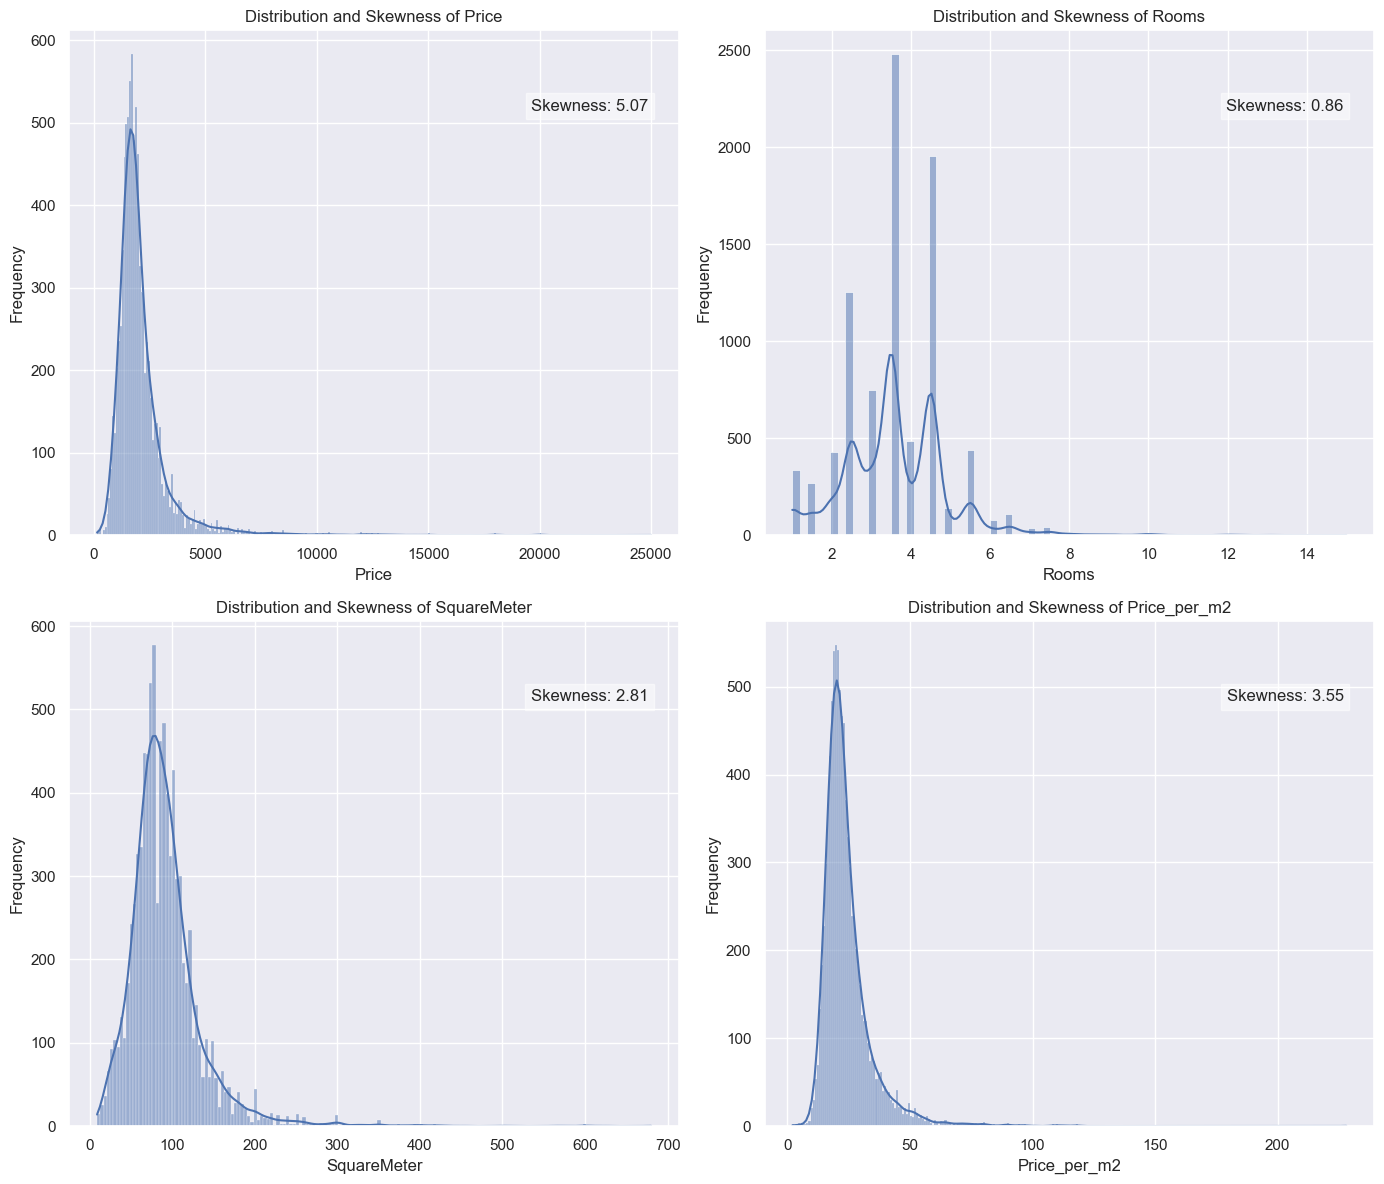

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2x2 Grid für 4 Plots
columns = ['Price', 'Rooms', 'SquareMeter', 'Price_per_m2']
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(df_filtered_property_location_clean[col], kde=True, ax=ax)
    ax.set_title(f'Distribution and Skewness of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    skew_val = df_filtered_property_location_clean[col].skew()
    ax.text(0.95, 0.85, f'Skewness: {skew_val:.2f}', transform=ax.transAxes, 
            horizontalalignment='right', verticalalignment='center', 
            fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

<a id="10"></a>
### Distribution

<a id="11"></a>
#### Distribution per Object Type
The following diagram shows the distribution per Object Type

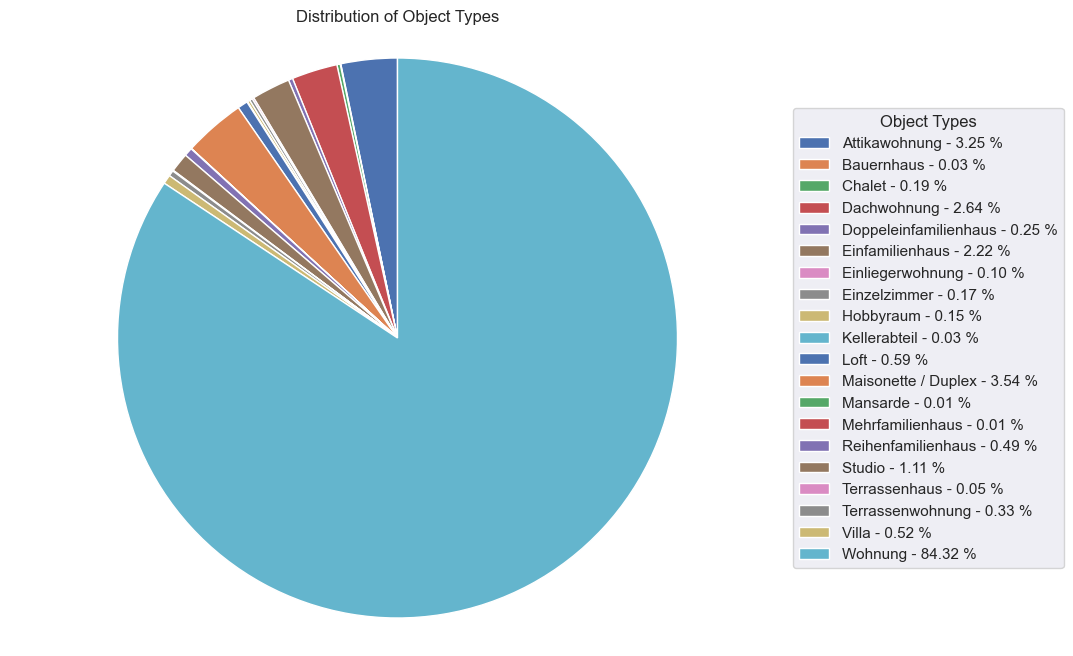

In [8]:
object_type_counts = df_filtered_property_location_clean.groupby('ObjectType').size()
percentages = 100 * object_type_counts / object_type_counts.sum()
legend_labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(object_type_counts.index, percentages)]

sns.set(style="dark")

plt.figure(figsize=(10, 8))
patches, texts = plt.pie(object_type_counts, labels=None, startangle=90)

plt.axis('equal')
plt.legend(patches, legend_labels, title="Object Types", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Object Types')
plt.show()

<a id="12"></a>
#### Top 10 Object Types
The top 10 Object Types are shown in the following bar chart

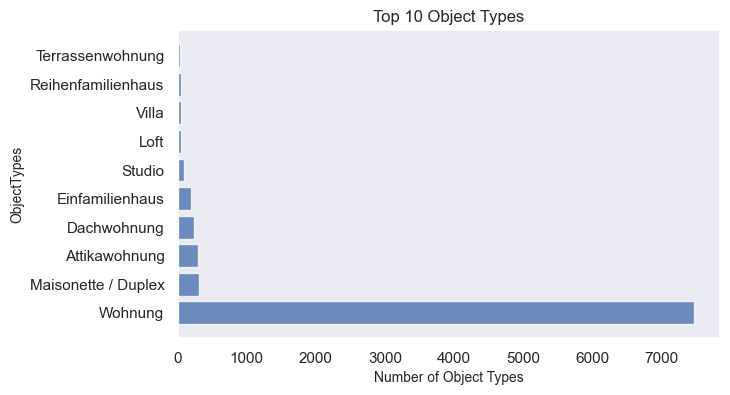

In [9]:
df_bar_property = df_filtered_property_location_clean['ObjectType'].value_counts().nlargest(10).sort_values(ascending=False)

napart = list(df_bar_property.values)
index = list(df_bar_property.index.values)
y_pos = np.arange(len(index))

fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='b', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of Object Types', fontsize=10)
ax.set_ylabel('ObjectTypes', fontsize=10)

plt.title('Top 10 Object Types')
plt.show()

<a id="13"></a>
#### Top 10 Landlords
The properties are offered by the following top 10 landlords

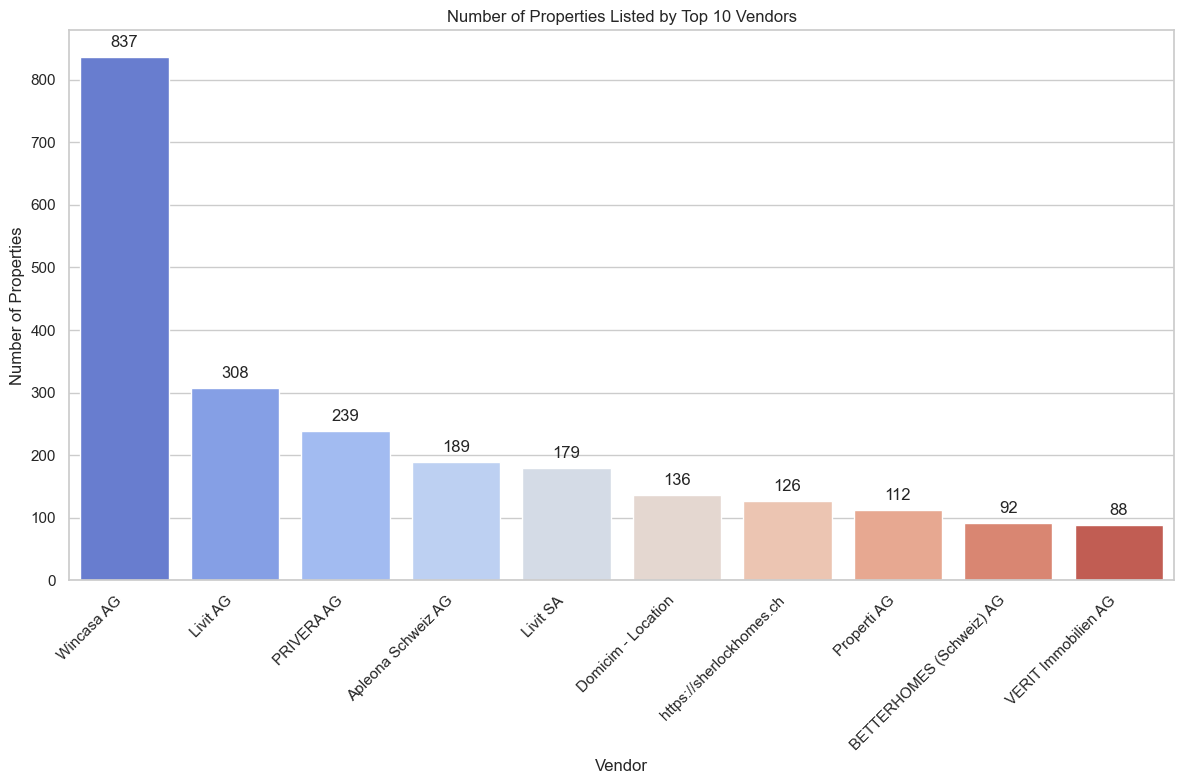

In [10]:
vendor_counts = df_filtered_property_location_clean['Vendor'].value_counts()

top_vendors = vendor_counts.nlargest(10).index

top_vendors_data = df_filtered_property_location_clean[df_filtered_property_location_clean['Vendor'].isin(top_vendors)]

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Vendor', data=top_vendors_data, palette='coolwarm', order=top_vendors)

plt.xticks(rotation=45, ha='right')

plt.title('Number of Properties Listed by Top 10 Vendors')
plt.xlabel('Vendor')
plt.ylabel('Number of Properties')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit the rotated x labels
plt.show()

<a id="14"></a>
### Extreme Values

<a id="15"></a>
#### Cheapest Properties
The following table lists the ten cheapest properties based on price per square meter

In [11]:
filtered_df = df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] <= 10]
sorted_df = filtered_df.sort_values(by='Price_per_m2')
top_10_cheapest_properties = sorted_df.head(10)
top_10_cheapest_properties

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
1239,3000342437,2024-03-27 14:34:47,4.5,100.0,NaN,Sofort,Chalet,1900-01-01,200.0,NaN,...,Surses,100.0,90.0,100.0,90.0,7.0,0,0,0,2.000000
862,4000935764,2024-03-27 21:19:52,1.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,820.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,2.733333
2447,4000954407,2024-03-26 22:13:30,1.0,200.0,-1,Sofort,Einzelzimmer,NaN,700.0,NaN,...,Lugano,97.0,77.0,97.0,77.0,825.0,10,6,14,3.500000
817,4000935766,2024-03-27 21:19:28,2.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
861,4000935765,2024-03-27 21:19:40,4.5,300.0,2,Nach Vereinbarung,Wohnung,2024-01-01,1470.0,70.0,...,Muri (AG),112.0,102.0,112.0,102.0,659.0,2,1,3,4.900000
1110,4000740722,2024-03-27 17:16:55,4.0,80.0,2,Sofort,Maisonette / Duplex,NaN,400.0,NaN,...,Bure,285.0,225.0,285.0,225.0,47.0,1,0,0,5.000000
5962,4000958101,2024-03-27 13:56:40,1.0,130.0,NaN,Nach Vereinbarung,Wohnung,NaN,800.0,NaN,...,Luzern,160.0,170.0,160.0,170.0,2827.0,5,2,2,6.153846
8604,4000615911,2024-03-29 21:28:24,1.0,21.0,-1,Sofort,Kellerabteil,2018-01-01,140.0,NaN,...,Aadorf,109.0,151.0,109.0,151.0,454.0,1,2,2,6.666667
4247,4000483887,2024-03-24 03:11:11,1.0,45.0,-1,Sofort,Kellerabteil,NaN,300.0,NaN,...,Opfikon,99.0,94.0,99.0,94.0,3759.0,9,5,13,6.666667
462,4000861865,2024-03-29 17:15:38,4.5,258.0,EG,01.06.2024,Wohnung,1985-01-01,1952.0,100.0,...,Martigny,100.0,110.0,100.0,110.0,620.0,6,2,36,7.565891


<a id="16"></a>
#### Most Expensive Properties
The following table lists the ten most expensive properties based on price per square meter

In [12]:
filtered_df_high = df_filtered_property_location_clean[df_filtered_property_location_clean['Price_per_m2'] >= 100]
sorted_df_high = filtered_df_high.sort_values(by='Price_per_m2', ascending=False)
top_10_expensive_properties = sorted_df_high.head(10)
top_10_expensive_properties

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
8734,4000665076,2024-03-29 22:18:16,1.0,15.0,1,Nach Vereinbarung,Wohnung,NaN,3420.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,12,7,85,228.000000
8781,3003125493,2024-03-29 22:32:20,1.0,50.0,NaN,Nach Vereinbarung,Wohnung,NaN,5917.0,211.0,...,Genève,147.5,45.49,147.5,45.49,12811.0,9,12,106,118.340000
4266,3003168595,2024-03-24 03:17:41,1.0,36.0,NaN,Nach Vereinbarung,Wohnung,NaN,4246.0,156.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,117.944444
8219,4000842714,2024-03-29 18:58:03,1.5,13.0,2,Sofort,Wohnung,2018-01-01,1530.0,NaN,...,Sion,100.0,110.00,100.0,110.00,995.0,4,0,3,117.692308
3878,4000920597,2024-03-24 01:42:30,3.0,36.0,4,Sofort,Dachwohnung,2023-01-01,4120.0,NaN,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,3,27,114.444444
4261,3003169310,2024-03-24 03:14:31,2.0,37.0,NaN,Nach Vereinbarung,Wohnung,NaN,4142.0,152.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,9,5,126,111.945946
4260,3003169151,2024-03-24 03:15:30,2.0,46.0,NaN,Nach Vereinbarung,Wohnung,NaN,5076.0,186.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,7,4,76,110.347826
4142,3003168603,2024-03-24 02:44:06,2.0,32.0,NaN,Nach Vereinbarung,Wohnung,NaN,3519.0,129.0,...,Zürich,99.0,119.00,99.0,119.00,4779.0,10,1,35,109.968750
1354,4000857273,2024-03-27 13:52:45,7.5,230.0,NaN,Nach Vereinbarung,Einfamilienhaus,NaN,25000.0,NaN,...,Horw,160.0,145.00,160.0,145.00,1108.0,2,0,0,108.695652
1356,4000465081,2024-03-29 22:19:24,1.0,25.0,5,Sofort,Wohnung,NaN,2700.0,NaN,...,Genève,147.5,45.49,147.5,45.49,12811.0,10,9,79,108.000000


<a id="17"></a>
### Contingency Tables

<a id="18"></a>
#### Number of Rooms across entire Price Range
The following table shows the frequencies of properties with a certain number of rooms across the entire price range.









In [13]:
df = df_filtered_property_location_clean

pivot_table_df = df.pivot_table(index='Rooms', columns=pd.cut(df['Price'], bins=8), values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(115.14, 3247.5]","(3247.5, 6355.0]","(6355.0, 9462.5]","(9462.5, 12570.0]","(12570.0, 15677.5]","(15677.5, 18785.0]","(18785.0, 21892.5]","(21892.5, 25000.0]"
Rooms,,,,,,,,
1.000000,332,6,0,0,0,0,0,0
1.500000,270,0,0,0,0,0,0,0
2.000000,411,19,1,0,0,0,0,0
2.500000,1220,34,0,0,0,0,0,0
3.000000,729,18,2,0,0,0,0,0
3.500000,2368,106,6,0,0,0,0,0
4.000000,433,51,1,0,0,0,0,0
4.500000,1760,171,19,4,0,0,0,0
5.000000,89,49,4,0,0,0,0,0


<a id="19"></a>
#### Number of Rooms and certain Price Range I
The following table shows the frequencies of properties with a certain number of rooms and a certain price range (CHF 136.89 - 3245).

In [14]:
#More details on prices between CHF 136.895 - 3245.-
df = df_filtered_property_location_clean

price_range_filtered = df[(df['Price'] > 136.895) & (df['Price'] <= 3247.5)]

price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(136.895, 528.125]","(528.125, 916.25]","(916.25, 1304.375]","(1304.375, 1692.5]","(1692.5, 2080.625]","(2080.625, 2468.75]","(2468.75, 2856.875]","(2856.875, 3245.0]"
Rooms,,,,,,,,
1.000000,18,127,107,45,18,8,5,4
1.500000,1,81,102,44,29,8,3,2
2.000000,1,37,160,117,54,23,11,8
2.500000,0,38,266,513,242,87,52,22
3.000000,0,19,159,295,155,55,21,25
3.500000,0,11,201,692,844,357,175,88
4.000000,1,1,41,166,107,51,43,23
4.500000,1,2,60,315,616,413,237,116
5.000000,0,1,2,16,21,27,10,12


<a id="20"></a>
#### Number of Rooms and certain Price Range II
The following table shows the frequencies of properties with a certain number of rooms and a certain price range (CHF 1304 - 2856).

In [15]:
df = df_filtered_property_location_clean

price_range_filtered = df[(df['Price'] > 1304.00) & (df['Price'] <= 2856.00)]

price_bins = pd.cut(price_range_filtered['Price'], bins=8)
pivot_table_df = price_range_filtered.pivot_table(index='Rooms', columns=price_bins, values='Price', aggfunc='count', fill_value=0)

styled_pivot_table = (pivot_table_df
                      .style
                      .background_gradient(axis=None)
                      .bar(axis=None)
                      .set_properties(**{'color': 'black'}))

styled_pivot_table

Price,"(1307.453, 1502.375]","(1502.375, 1695.75]","(1695.75, 1889.125]","(1889.125, 2082.5]","(2082.5, 2275.875]","(2275.875, 2469.25]","(2469.25, 2662.625]","(2662.625, 2856.0]"
Rooms,,,,,,,,
1.000000,24,21,10,8,5,3,0,5
1.500000,26,18,16,13,7,1,2,1
2.000000,80,38,32,22,11,11,6,5
2.500000,286,232,157,81,56,30,30,22
3.000000,149,147,92,62,34,21,8,13
3.500000,317,384,479,356,219,138,110,65
4.000000,85,81,53,54,34,17,24,19
4.500000,122,197,300,312,222,192,134,102
5.000000,6,10,8,13,17,10,6,4


<a id="21"></a>
### Correlation Matrixes

<a id="22"></a>
#### Relationship of Prices and Proximity to Services

The following correlation matrix shows the relationships between property prices and their proximity to various services.

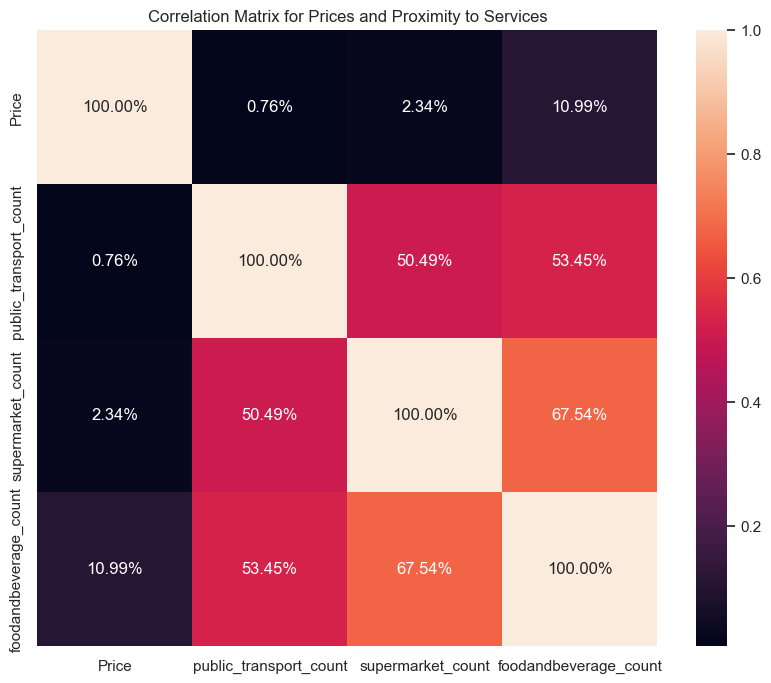

In [16]:
df_filtered_property_location_clean.dropna(subset=['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count'], inplace=True)

correlation_matrix = df_filtered_property_location_clean[['Price', 'public_transport_count', 'supermarket_count', 'foodandbeverage_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2%')

plt.title('Correlation Matrix for Prices and Proximity to Services')
plt.show()

<a id="24"></a>
#### Relationship of Prices and Income- and Wealth taxes and Population Densitys

The following correlation matrix shows the relationships between property prices and their rooms and square meters.

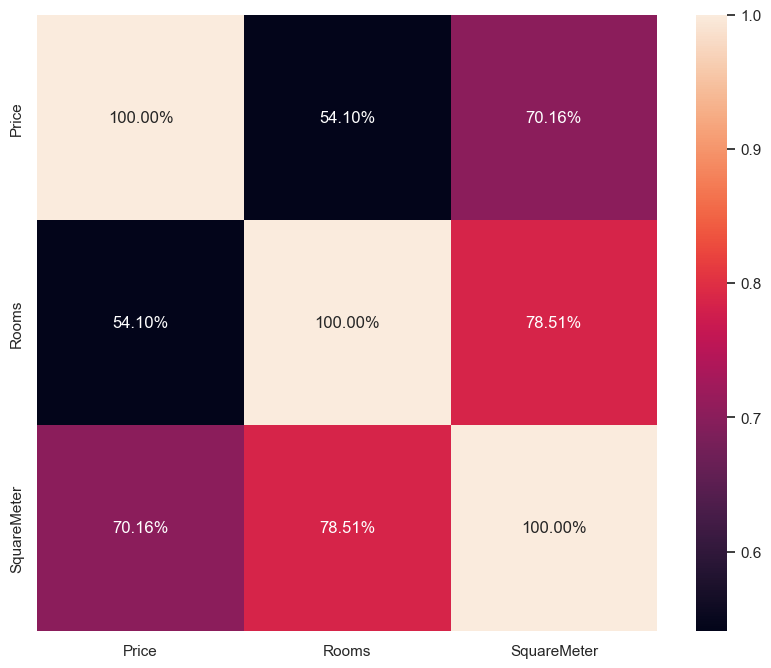

In [17]:
plt.figure(figsize=(10,8))
columns =['Price','Rooms','SquareMeter']
sns.heatmap(df_filtered_property_location_clean[columns].corr(),annot=True,fmt='.2%')
plt.show()

<a id="25"></a>
### Relation between Variables

The following correlation matrix shows the relationships between property prices and various factors, including income tax and wealth tax rates at the canton and municipal levels, as well as population density.

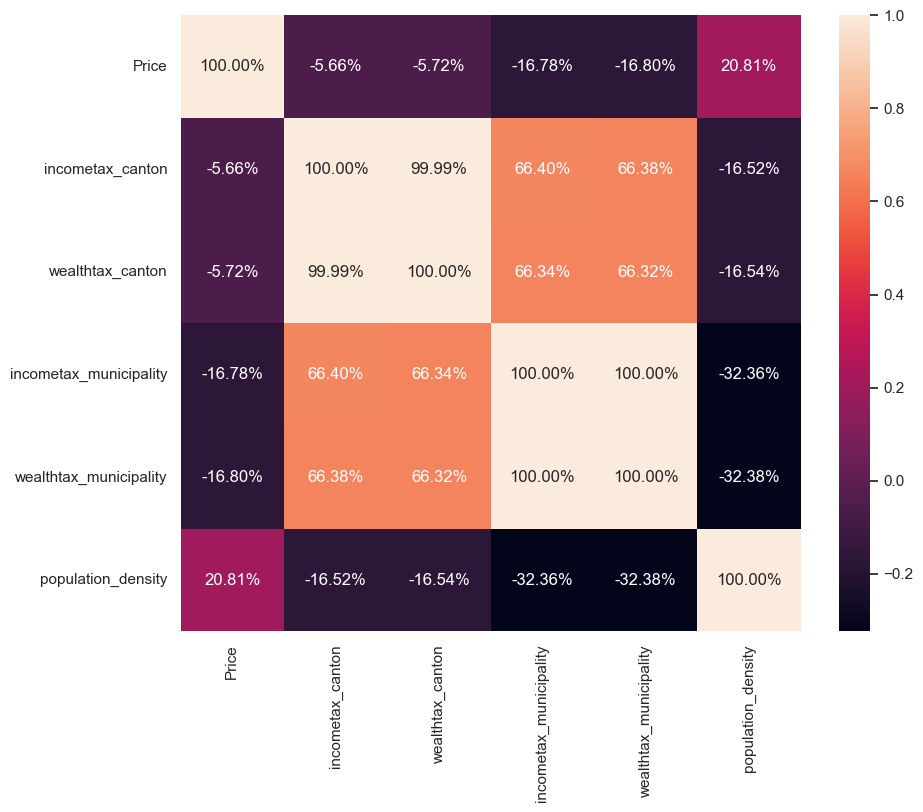

In [18]:
plt.figure(figsize=(10,8))
columns =['Price','incometax_canton','wealthtax_canton','incometax_municipality','wealthtax_municipality','population_density']
sns.heatmap(df_filtered_property_location_clean[columns].corr(),annot=True,fmt='.2%')
plt.show()

### Relation between Variables

<a id="26"></a>
#### Price vs. Number of Rooms

The following scatter plots show the relationship between the price and the number of rooms in the properties. The second and third plots focus on smaller and more affordable properties.

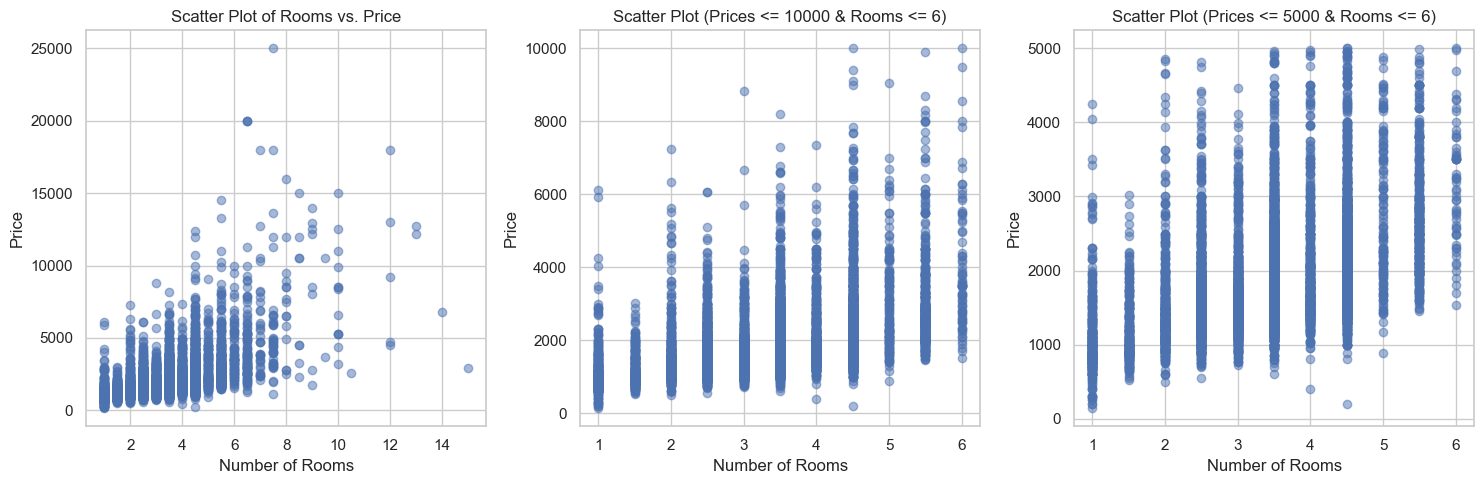

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original DataFrame scatter plot
axes[0].scatter(df_filtered_property_location_clean['Rooms'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0].set_title('Scatter Plot of Rooms vs. Price')
axes[0].set_xlabel('Number of Rooms')
axes[0].set_ylabel('Price')

# Filtered DataFrame scatter plot (Prices <= 10000 and Rooms <= 6)
filtered_df = df_filtered_property_location_clean[(df_filtered_property_location_clean['Price'] <= 10000) & (df_filtered_property_location_clean['Rooms'] <= 6)]
axes[1].scatter(filtered_df['Rooms'], filtered_df['Price'], alpha=0.5)
axes[1].set_title('Scatter Plot (Prices <= 10000 & Rooms <= 6)')
axes[1].set_xlabel('Number of Rooms')
axes[1].set_ylabel('Price')

# Further filtered DataFrame scatter plot (Prices <= 5000 and Rooms <= 6)
filtered2_df = df_filtered_property_location_clean[(df_filtered_property_location_clean['Price'] <= 5000) & (df_filtered_property_location_clean['Rooms'] <= 6)]
axes[2].scatter(filtered2_df['Rooms'], filtered2_df['Price'], alpha=0.5)
axes[2].set_title('Scatter Plot (Prices <= 5000 & Rooms <= 6)')
axes[2].set_xlabel('Number of Rooms')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()

<a id="27"></a>
#### Price vs. various Variables

The following scatter plots show the relationship between the price and a various variables.

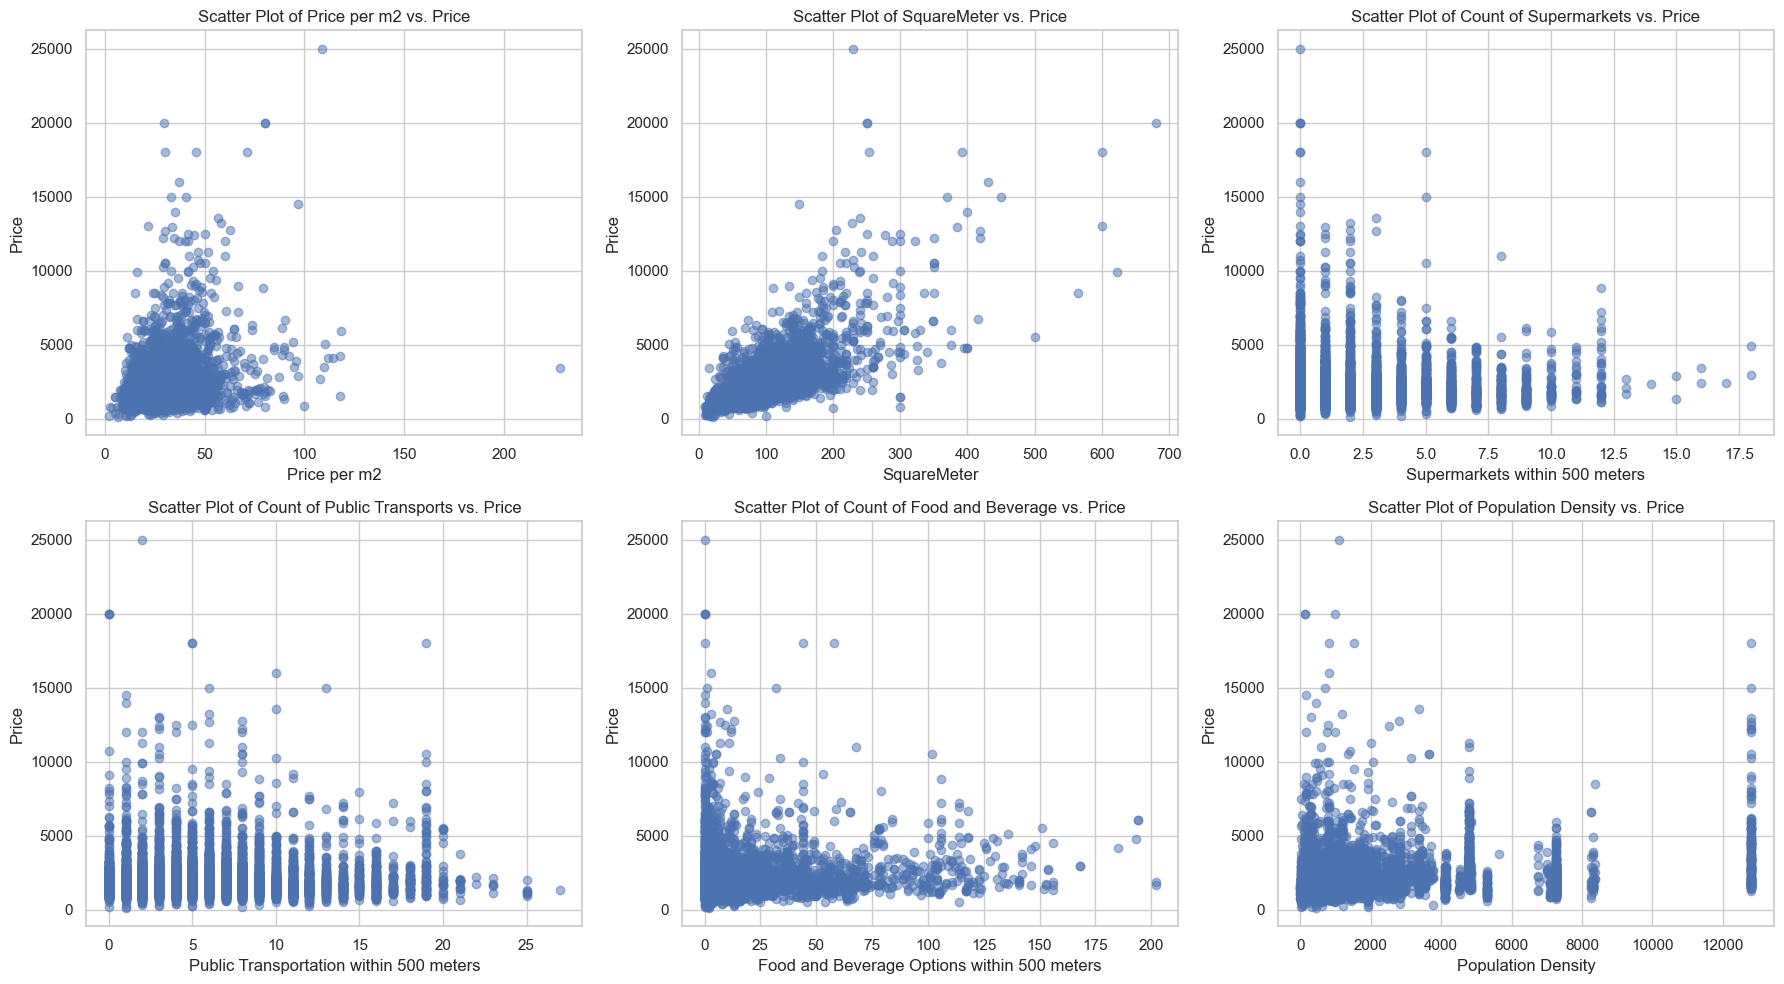

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Scatter plot for Price per m2 vs. Price
axes[0, 0].scatter(df_filtered_property_location_clean['Price_per_m2'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 0].set_title('Scatter Plot of Price per m2 vs. Price')
axes[0, 0].set_xlabel('Price per m2')
axes[0, 0].set_ylabel('Price')

# Scatter plot for SquareMeter vs. Price
axes[0, 1].scatter(df_filtered_property_location_clean['SquareMeter'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 1].set_title('Scatter Plot of SquareMeter vs. Price')
axes[0, 1].set_xlabel('SquareMeter')
axes[0, 1].set_ylabel('Price')

# Scatter plot for Count of Supermarkets vs. Price
axes[0, 2].scatter(df_filtered_property_location_clean['supermarket_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[0, 2].set_title('Scatter Plot of Count of Supermarkets vs. Price')
axes[0, 2].set_xlabel('Supermarkets within 500 meters')
axes[0, 2].set_ylabel('Price')

# Scatter plot for Count of Public Transports vs. Price
axes[1, 0].scatter(df_filtered_property_location_clean['public_transport_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 0].set_title('Scatter Plot of Count of Public Transports vs. Price')
axes[1, 0].set_xlabel('Public Transportation within 500 meters')
axes[1, 0].set_ylabel('Price')

# Scatter plot for Count of Food and Beverage vs. Price
axes[1, 1].scatter(df_filtered_property_location_clean['foodandbeverage_count'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 1].set_title('Scatter Plot of Count of Food and Beverage vs. Price')
axes[1, 1].set_xlabel('Food and Beverage Options within 500 meters')
axes[1, 1].set_ylabel('Price')

# Scatter plot for Population Density vs. Price
axes[1, 2].scatter(df_filtered_property_location_clean['population_density'], df_filtered_property_location_clean['Price'], alpha=0.5)
axes[1, 2].set_title('Scatter Plot of Population Density vs. Price')
axes[1, 2].set_xlabel('Population Density')
axes[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()


<a id="28"></a>
### Visualization of Geographical Data



<a id="29"></a>
#### Heatmap
The following code snippet presents a heatmap of all properties. It utilizes the longitude and latitude coordinates. The Price attribute is used as the weight for each point, with areas of high concentrations of expensive properties being more intensely colored. 

In [21]:
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), 
                           df_filtered_property_location_clean['longitude'].mean()], 
                 zoom_start=8,  
                 min_zoom=2,  
                 max_zoom=12) 

heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

HeatMap(heat_data).add_to(map)

map

<a id="30"></a>
#### Interactive Heatmap
The following code snippet is used to create an interactive heatmap and save it as Heatmap.html. It utilizes the longitude and latitude coordinates. The Price attribute is used as the weight for each point, with areas of high concentrations of expensive properties being more intensely colored. For each property, the price, number of rooms, and square meters are displayed.

Due to performance considerations, the heatmap is saved as an HTML file (Trust HTML) instead of being loaded directly in the notebook. 

In [22]:
import folium
from folium.plugins import HeatMap

# Create a map centered at the mean latitude and longitude, with a zoomed-out view
map = folium.Map(location=[df_filtered_property_location_clean['latitude'].mean(), 
                           df_filtered_property_location_clean['longitude'].mean()], 
                 zoom_start=10)  # Set to a more zoomed-out view

# Create data for the Heatmap
heat_data = [[row['latitude'], row['longitude'], row['Price']] for index, row in df_filtered_property_location_clean.iterrows()]

# Add the Heatmap to the map object
HeatMap(heat_data).add_to(map)

# Optional: Add markers with tooltips
for index, row in df_filtered_property_location_clean.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"<strong>Preis:</strong> {row['Price']} CHF<br><strong>Anzahl Zimmer:</strong> {row['Rooms']}<br><strong>Quadratmeter:</strong> {row['SquareMeter']} m²",
        tooltip="Klicke für mehr Informationen"
    ).add_to(map)

map.save('Heatmap.html')
#map


End of EDA